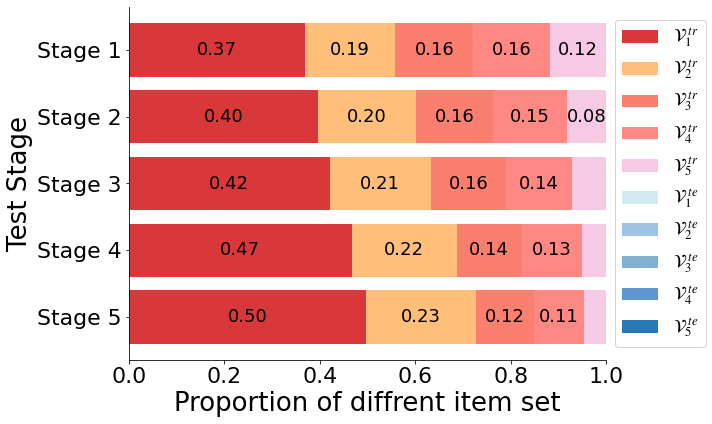

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['mathtext.fontset'] = 'stix'  
plt.rcParams['font.family'] = 'Arial'      

# Load data
data = [np.array([0.49605674, 0.23131915, 0.12104255, 0.1057234 , 0.04585816,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 np.array([0.46692199, 0.21948936, 0.13665248, 0.12507801, 0.05185816,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 np.array([0.42060326, 0.21210788, 0.15738112, 0.13801278, 0.07189496,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 np.array([0.39267186, 0.20214741, 0.16024309, 0.15297449, 0.08196315,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 np.array([0.38560681, 0.19801987, 0.17066217, 0.16745564, 0.1232555 ,
        0.        , 0.        , 0.        , 0.        , 0.        ])]

data = np.array(data)

# Normalization
data = data / data.sum(axis=1, keepdims=True)

# Define lable
categories = [r'Stage 5', r'Stage 4', r'Stage 3', r'Stage 2', r'Stage 1']
labels = [r'$\mathcal{V}^{\ tr}_1$', r'$\mathcal{V}^{\ tr}_2$', r'$\mathcal{V}^{\ tr}_3$', r'$\mathcal{V}^{\ tr}_4$', r'$\mathcal{V}^{\ tr}_5$',
          r'$\mathcal{V}^{\ te}_1$', r'$\mathcal{V}^{\ te}_2$', r'$\mathcal{V}^{\ te}_3$', r'$\mathcal{V}^{\ te}_4$', r'$\mathcal{V}^{\ te}_5$']

# Define color
# colors = plt.cm.tab20.colors[:data.shape[1]]  # 
colors = ['#D8383A','#FFBE7A','#FA7F6F','#FF8884','#F6CAE5','#CFEAF1','#9DC3E7','#82B0D2','#5F97D2','#2878B5' ]


bottom = np.zeros(len(categories))

plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):  
    bars = plt.barh(categories, data[:, i], left=bottom, color=colors[i], label=labels[i])
    bottom += data[:, i]  

    # Show value of each bar
    for j, (value, bar) in enumerate(zip(data[:, i], bars)):
        if value > 0.08:  
            width = bar.get_width()
            x = bar.get_x() + width / 2  
            y = bar.get_y() + bar.get_height() / 2  
            plt.text(x, y, f'{value:.2f}', ha='center', va='center', fontsize=18, color='black')

# Title / Lable
# plt.title(r'Stacked Horizontal Bar Chart with $\beta$', fontsize=14)
plt.xlabel(r'Proportion of diffrent item set', fontsize=26)
plt.ylabel('Test Stage', fontsize=26)
plt.xticks(fontsize=22)  
plt.yticks(fontsize=22) 

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize= 18)

ax = plt.gca()  
ax.spines['top'].set_visible(False)    
ax.spines['right'].set_visible(False)  

plt.tight_layout()
plt.savefig('./mf_rec.pdf', format='pdf', bbox_inches='tight')

# plt.show()

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

In [24]:
dataset = 'kuairec'
saved_data_path = f'/data/{dataset}/data/'
saved_metric_path = f'/data/{dataset}/mf/metric/'

In [25]:
ground_truth = np.load(saved_data_path + 'hist_list_ground_truth.npy')
ground_truth_df = pd.DataFrame(ground_truth.T, columns = ['1', '2', '3', '4', '5'])
ground_truth_df = ground_truth_df.sample(frac=0.1)
ground_truth_df['Method'] = 'Ground truth'
cnif_results = np.load(saved_metric_path + 'hist_list_cnif.npy')
cnif_df = pd.DataFrame(cnif_results.T, columns = ['1', '2', '3', '4', '5'])
cnif_df['Method'] = 'CNIF'
cnif_df = cnif_df.loc[ground_truth_df.index]
fair_results = np.load(saved_metric_path + 'fairagent_hist_list.npy')
fair_df = pd.DataFrame(fair_results.T, columns = ['1', '2', '3', '4', '5'])
fair_df['Method'] = 'FairAgent'
fair_df = fair_df.loc[ground_truth_df.index]

In [10]:
plot_kuairec_df = pd.concat([ground_truth_df, cnif_df, fair_df])
plot_kuairec_df = plot_kuairec_df.melt(id_vars="Method", var_name="Test Stage")

In [23]:
plot_kuairec_big_df = pd.concat([ground_truth_df, cnif_df, fair_df])
plot_kuairec_big_df = plot_kuairec_big_df.melt(id_vars="Method", var_name="Test Stage")

In [26]:
plot_steam_df = pd.concat([ground_truth_df, cnif_df, fair_df])
plot_steam_df = plot_steam_df.melt(id_vars="Method", var_name="Test Stage")

In [50]:
plot_kuairec_df 

,Method,Test Stage,value
0,Ground truth,1,0.184883
1,Ground truth,1,0.015011
2,Ground truth,1,0.156400
3,Ground truth,1,-0.024177
4,Ground truth,1,0.032706
...,...,...,...
21070,FairAgent,5,-0.170752
21071,FairAgent,5,-0.119548
21072,FairAgent,5,-0.110943
21073,FairAgent,5,-0.108016


In [33]:
plot_kuairec_df.rename(columns = {'value':'TGF'})

,Method,Test Stage,TGF
0,Ground truth,1,0.043776
1,Ground truth,1,0.049697
2,Ground truth,1,-0.009547
3,Ground truth,1,0.047368
4,Ground truth,1,0.020114
...,...,...,...
21070,FairAgent,5,-0.027916
21071,FairAgent,5,-0.072401
21072,FairAgent,5,-0.098673
21073,FairAgent,5,-0.123377


Handles: [<matplotlib.lines.Line2D object at 0x7f9cb52aed60>, <matplotlib.lines.Line2D object at 0x7f9cb52f1700>, <matplotlib.lines.Line2D object at 0x7f9cb528c0a0>, <matplotlib.lines.Line2D object at 0x7f9cb524b880>, <matplotlib.lines.Line2D object at 0x7f9cb5257850>, <matplotlib.lines.Line2D object at 0x7f9cb52614f0>]
Labels: ['Ground truth', 'CNIF', 'FairAgent', 'Ground truth', 'CNIF', 'FairAgent']


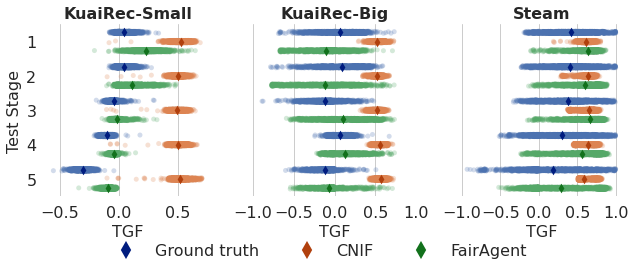

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_theme(style="whitegrid")

# Initialize 1 x 3
f, axes = plt.subplots(1, 3, figsize=(9, 4), sharey=True)  
sns.despine(bottom=True, left=True)

# Define three datasets and x/y/titles
data_list = [plot_kuairec_df.rename(columns = {'value':'TGF'}), plot_kuairec_big_df.rename(columns = {'value':'TGF'}), plot_steam_df.rename(columns = {'value':'TGF'})]  # 假设有三个不同的数据集
titles = ["KuaiRec-Small", "KuaiRec-Big", "Steam"]
x_vars = ["TGF", "TGF", "TGF"]  # x 轴对应的列
y_vars = ["Test Stage", "Test Stage", "Test Stage"]  # y 轴对应的列

# Plot
for i, ax in enumerate(axes):
    
    data = data_list[i]
    title = titles[i]
    x_var = x_vars[i]
    y_var = y_vars[i]

    if "Method" not in data.columns:
        raise ValueError(f"Column 'Method' not found in dataset {i}")

    sns.stripplot(
        data=data, x=x_var, y=y_var, hue="Method",
        dodge=True, alpha=0.25, zorder=1, legend=True, ax=ax  
    )

    sns.pointplot(
        data=data, x=x_var, y=y_var, hue="Method",
        dodge=0.8 - 0.8 / 3, palette="dark", errorbar=None,
        markers="d", markersize=4, linestyle="none", legend=True, ax=ax 
    )

    ax.tick_params(axis='both', labelsize=16)  
    ax.set_xlabel(x_var, fontsize=16)  
    ax.set_title(title, fontsize=16, fontweight="bold")  
    if i == 0:
        ax.set_xticks([-0.5, 0.0, 0.5])
    else:
        ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])

    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()  
print("Handles:", handles) 
print("Labels:", labels)  


if handles and labels:  
    f.legend(
        handles[-3:], labels[-3:], loc='lower center', bbox_to_anchor=(0.5, 0.03), 
        ncol=3, frameon=False, fontsize=16,  markerscale=2.5
    )
else:
    print("No legend handles and labels found! Check your data and 'hue' parameter.")

axes[0].set_ylabel(y_vars[0], fontsize=16) 
for ax in axes[1:]:  
    ax.set_ylabel("")

plt.tight_layout(rect=[0, 0.1, 1, 1])  
plt.savefig('./user_prefer_dynamic.pdf')

# plt.show()